# Data Cleansing

Zu den Hauptaufgaben des Data Cleansing gehört das Eliminieren bzw Korrigieren von fehlenden, fehlerhaften, irrelevanten oder konstanten Werten in einem Datenset.

## Fehlende Werte

Fehlende Werte kommen in der Praxis häufig vor.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

Ich verwende einen angepassten Ausschnitts des Palmer Penguins Datensatzes: 

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/

In [2]:
penguins = pd.read_csv (r'short_penguins.csv')
penguins

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,?
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
6,22,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
7,23,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
8,24,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
9,25,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


Pandas erkennt sofort fehlende Werte. Problematisch wird es erst bei fehlenden Werten, die willkürlich gekennzeichnet sind und daher nicht erkannt werden.

In [3]:
penguins.isnull()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


Möchte man nur eine Spalte im Datensatz ansehen, um fehlende Werte zu kontrollieren, macht man dies wie folgt:

In [ ]:
penguins['sex'].isnull()

Man sieht eindeutig, dass ein Eintrag wie 'na' oder '?' zu einem Problem wird. Dies kann auch bei anderenen Einträgen wie 'n/a' oder '-' passieren. Um dem entgegenzuarbeiten kann man eine eigene Liste für fehlende Werte anlegen, die jederzeit erweitert werden kann. 

In [4]:
missings=['na','?','n/a','-']
penguins=pd.read_csv ('short_penguins.csv', na_values=missings)
penguins

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
6,22,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
7,23,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
8,24,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
9,25,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


In [5]:
penguins['sex'].isnull()

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
Name: sex, dtype: bool

In [6]:
penguins.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    2
body_mass_g          1
sex                  2
dtype: int64

In [7]:
penguins.isnull().sum().sum()

7

## Ausreißer
Ausreißer sind signifikant anders als andere Werte. Visualisierungen wie Boxplots helfen diese zu erkennen.

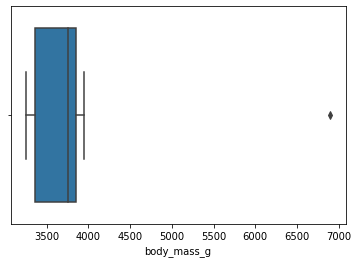

In [8]:
sns.boxplot(penguins['body_mass_g']);

## Fehlerhafte, konstante und irrelevante Merkmale
Auch diese sollten erkannt und entweder ganz gelöscht oder bearbeitet werden.

In [9]:
penguins

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,21,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
6,22,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
7,23,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
8,24,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
9,25,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male
